In [1]:
from sklearn.ensemble import RandomForestClassifier
from collections import deque
import numpy as np
import scipy.io
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# load data
data = scipy.io.loadmat('game_data.mat')
x = np.concatenate((data['a'],data['b']),axis=1)

In [4]:
data = pd.DataFrame(x,columns=['buy','sell'])
data.index = pd.to_datetime(data.index,unit='s')
data.head()

,buy,sell
1970-01-01 00:00:00,34.2,16.0
1970-01-01 00:00:01,34.2,16.0
1970-01-01 00:00:02,2.0,-2.8
1970-01-01 00:00:03,4.6,2.6
1970-01-01 00:00:04,0.6,-8.0


In [39]:
data.profit = data.sell - data.buy - 0.2
data.oneday_trade_long = data.sell - data.buy.shift(1) - 0.2
data.oneday_trade_short = data.sell - data.buy.shift(2) - 0.2

In [109]:
mean_cost = np.mean(data.profit)
std_cost = np.std(data.profit)
print "thr mean cost {0}, the std cost is {1}".format(mean_cost, std_cost)

thr mean cost -1.5678097707, the std cost is 0.627948371657


In [111]:
cost = mean_cost - 1.65* std_cost
print " the estimate cost is %.5f" % cost

 the estimate cost is -2.60392


In [51]:
data.oneday_trade_long.head()

1970-01-01 00:00:00     NaN
1970-01-01 00:00:01   -18.4
1970-01-01 00:00:02   -37.2
1970-01-01 00:00:03     0.4
1970-01-01 00:00:04   -12.8
dtype: float64

In [52]:
data.oneday_trade_short.head()

1970-01-01 00:00:00     NaN
1970-01-01 00:00:01     NaN
1970-01-01 00:00:02   -37.2
1970-01-01 00:00:03   -31.8
1970-01-01 00:00:04   -10.2
dtype: float64

In [97]:
long_changes = data.oneday_trade_long.values > 0
short_changes = data.oneday_trade_short.values > 0

In [98]:
print 'the chance that one day long trade profit %.5f' % (float(sum(long_changes))/len(long_changes))
print 'the chance that one day short trade profit %.5f' % (float(sum(short_changes))/len(short_changes))

the chance that one day long trade profit 0.00991
the chance that one day short trade profit 0.01132


In [99]:
long_time = data.oneday_trade_long.where(data.oneday_trade_long>0).dropna().index
short_time = data.oneday_trade_short.where(data.oneday_trade_short<0).dropna().index

In [100]:
long_point_data=data.oneday_trade_long.where(data.oneday_trade_long>0).fillna(0)
short_point_data=data.oneday_trade_short.where(data.oneday_trade_short>0).fillna(0)

In [102]:
%matplotlib inline

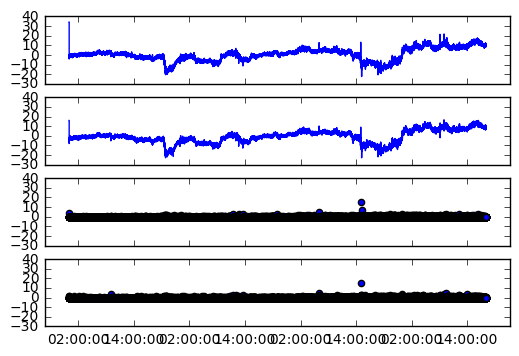

In [104]:
import matplotlib.pyplot as plt
# plt.scatter(data.index,long_point_data)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
ax1.plot(data.index,data.buy)
ax2.plot(data.index,data.sell)
ax3.scatter(data.index,long_point_data)
ax4.scatter(data.index,short_point_data)


In [175]:
changes = np.diff(data.buy)> 0

X = deque(maxlen=1000) # Independent, or input variables
Y = deque(maxlen=1000)
type(changes)
# X = deque(maxlen=500) # Independent, or input variables
# Y = deque(maxlen=500)

numpy.ndarray

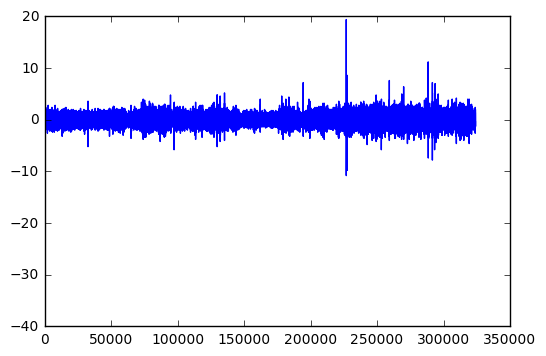

In [187]:
plt.plot(np.diff(data.buy))

In [202]:
for i in range (200,len(changes)):
    X.append(changes[i-20:i-1]) # Add independent variables, the prior changes
    Y.append(changes[i]) 
type(X)
type(Y)

collections.deque

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

type(Y_train)

list

In [204]:
classifier = RandomForestClassifier(max_depth=3,n_estimators=10)

In [205]:
classifier.fit(np.asarray(X_train),np.asarray(Y_train)) # Generate the model


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [206]:
from sklearn.metrics import accuracy_score

In [207]:
predict = []
prediction = classifier.predict(X_train)
accuracy_score(np.asarray(Y_train),prediction)# Predict

0.61799999999999999

In [208]:
float(sum(np.abs(prediction.astype(int) - np.array(Y_test).astype(int))))/len(prediction)

0.388

In [209]:
float(sum(np.array(Y_test).astype(int)))/len(prediction)

0.378

In [99]:
len(changes)

324029

In [38]:
np.array(X)

array([array([0]), array([0, 1]), array([0, 1, 1]), array([0, 1, 1, 0]),
       array([0, 1, 1, 0, 1]), array([0, 1, 1, 0, 1, 1]),
       array([0, 1, 1, 0, 1, 1, 0]), array([0, 1, 1, 0, 1, 1, 0, 1]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]),
       array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]),
      

In [ ]:
# Use the previous 10 bars' movements to predict the next movement.

# Use a random forest classifier. More here: http://scikit-learn.org/stable/user_guide.html


def initialize(context):
    context.security = sid(698) # Boeing
    context.window_length = 10 # Amount of prior bars to study
    
    context.classifier = RandomForestClassifier() # Use a random forest classifier
    
    # deques are lists with a maximum length where old entries are shifted out
    context.recent_prices = deque(maxlen=context.window_length+2) # Stores recent prices
    context.X = deque(maxlen=500) # Independent, or input variables
    context.Y = deque(maxlen=500) # Dependent, or output variable
    
    context.prediction = 0 # Stores most recent prediction
    
    schedule_function(rebalance, date_rules.every_day(), time_rules.market_close(minutes=5))
    schedule_function(record_vars, date_rules.every_day(), time_rules.market_close())
    
def rebalance(context, data):
    context.recent_prices.append(data.current(context.security, 'price')) # Update the recent prices
    if len(context.recent_prices) == context.window_length+2: # If there's enough recent price data
        
        # Make a list of 1's and 0's, 1 when the price increased from the prior bar
        changes = np.diff(context.recent_prices) > 0
        
        context.X.append(changes[:-1]) # Add independent variables, the prior changes
        context.Y.append(changes[-1]) # Add dependent variable, the final change
        
        if len(context.Y) >= 100: # There needs to be enough data points to make a good model
            
            context.classifier.fit(context.X, context.Y) # Generate the model
            
            context.prediction = context.classifier.predict(changes[1:]) # Predict
            
            # If prediction = 1, buy all shares affordable, if 0 sell all shares
            order_target_percent(context.security, context.prediction)
                
def record_vars(context, data):
    record(prediction=int(context.prediction))  
